In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


Saving ins.PNG to ins (1).PNG


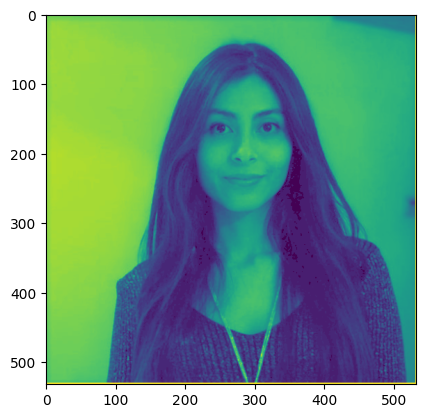

In [3]:
# Step 1: Upload grayscale image
uploaded = files.upload()
file_name = next(iter(uploaded))
img_data = np.frombuffer(uploaded[file_name], np.uint8)
gray = cv2.imdecode(img_data, cv2.IMREAD_GRAYSCALE)
plt.imshow(gray)

In [4]:
# Step 2: Normalize image to range 0-1 for transformation
normalized = gray / 255.0

In [5]:
# Step 3: Apply Log Transformation
c_log = 1
log_transform = c_log * np.log1p(normalized)
log_transform = np.uint8(255 * (log_transform / np.max(log_transform)))

In [6]:
# Step 4: Apply Gamma Transformation (gamma < 1 brightens image)
gamma = 0.5
gamma_transform = np.power(normalized, gamma)
gamma_transform = np.uint8(255 * gamma_transform)


In [7]:
# Step 5: Apply Power Log Transformation
c_powerlog = 1
power_log_transform = c_powerlog * np.power(np.log1p(normalized), 0.6)
power_log_transform = np.uint8(255 * (power_log_transform / np.max(power_log_transform)))


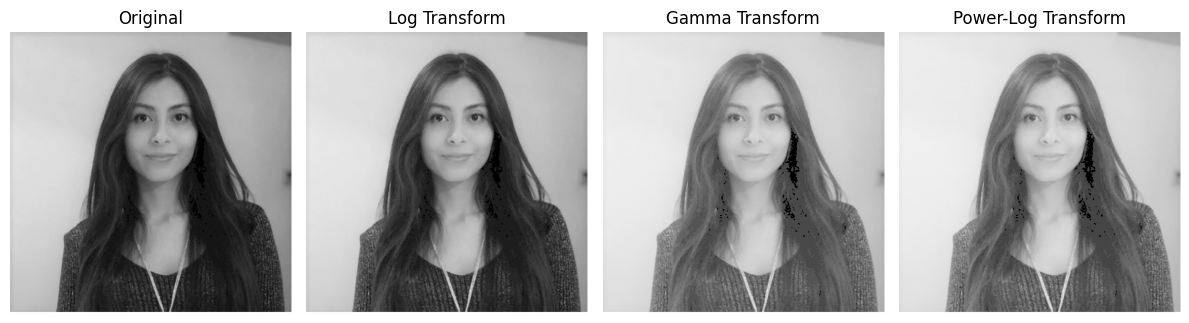

In [8]:
# Step 6: Display all results
titles = ['Original', 'Log Transform', 'Gamma Transform', 'Power-Log Transform']
images = [gray, log_transform, gamma_transform, power_log_transform]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()